In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
if os.path.exists('/content/drive/My Drive/Project data'):
  print('Google Drive mounted successfully!')
else:
  print('Failed to mount Google Drive. Please check your credentials and network connection.')

Google Drive mounted successfully!


In [6]:
# Group and interpolarte the data
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Project data/Edited propper 2.csv')
# Group by 'PARTNER COUNTRY' and 'YEAR', then apply linear interpolation
df_grouped = df.groupby(['PARTNER COUNTRY', 'YEAR']).apply(lambda group: group.interpolate(method='linear'))
print("Grouped Data:")
df_grouped

<ipython-input-6-84fb20067eb2>:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_grouped = df.groupby(['PARTNER COUNTRY', 'YEAR']).apply(lambda group: group.interpolate(method='linear'))
<ipython-input-6-84fb20067eb2>:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_grouped = df.groupby(['PARTNER COUNTRY', 'YEAR']).apply(lambda group: group.interpolate(method='linear'))
<ipython-input-6-84fb20067eb2>:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_grouped = df.groupby(['PARTNER COUNTRY', 'YEAR']).apply(lambda group: group.interpolate(method='linear'))
<ipython-input-6-84fb20067eb2>:6: FutureWarning: DataFr

Grouped Data:


<ipython-input-6-84fb20067eb2>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df.groupby(['PARTNER COUNTRY', 'YEAR']).apply(lambda group: group.interpolate(method='linear'))


REPORTER COUNTRY PARTNER COUNTRY  YEAR  \
PARTNER COUNTRY YEAR                                               
Angola          1996 25            NIGERIA          Angola  1996   
                1997 24            NIGERIA          Angola  1997   
                1998 23            NIGERIA          Angola  1998   
                1999 22            NIGERIA          Angola  1999   
                2000 21            NIGERIA          Angola  2000   
...                                    ...             ...   ...   
Yemen           2017 1798          NIGERIA           Yemen  2017   
                2018 1797          NIGERIA           Yemen  2018   
                2019 1796          NIGERIA           Yemen  2019   
                2020 1795          NIGERIA           Yemen  2020   
                2021 1794          NIGERIA           Yemen  2021   

                           IMPORT (US DOLLAR)  EXPORT (US DOLLAR)  \
PARTNER COUNTRY YEAR                                                
Angola          1996 25                   NaN                 NaN   
                1997 24             1985882.0                 NaN   
                1998 23             1584365.0                 NaN   
                1999 22                   NaN                 NaN   
                2000 21              882952.0                 NaN   
...                                       ...                 ...   
Yemen           2017 1798                 NaN                 NaN   
                2018 1797                 NaN                 NaN   
                2019 1796                 NaN            34901.62   
                2020 1795                 NaN            20534.47   
                2021 1794                 NaN            47130.12   

                           GDP (NIGERIA) GDP (PARTNER)  POPULATION (NIGERIA)  \
PARTNER COUNTRY YEAR                                                           
Angola          1996 25     1.857300e+11    6535434716             110956183   
                1997 24     2.008500e+11    7675412601             113791181   
                1998 23     2.184160e+11    6506381417             116690527   
                1999 22     5.914508e+10    6152922942             119695565   
                2000 21     6.917145e+10    9129594816             122851984   
...                                  ...           ...                   ...   
Yemen           2017 1798   3.757460e+11   26842228829             193495907   
                2018 1797   4.217390e+11   21606160784             198387623   
                2019 1796   4.745170e+11           NaN             203304492   
                2020 1795   4.321990e+11           NaN             208327405   
                2021 1794   4.408390e+11           NaN             213401323   

                           POPULATION (PARTNER)  DISTANCE  \
PARTNER COUNTRY YEAR                                        
Angola          1996 25              14383350.0      2464   
                1997 24              14871146.0      2464   
                1998 23              15366864.0      2464   
                1999 22              15870753.0      2464   
                2000 21              16394062.0      2464   
...                                         ...       ...   
Yemen           2017 1798                   NaN      4386   
                2018 1797                   NaN      4386   
                2019 1796                   NaN      4386   
                2020 1795                   NaN      4386   
                2021 1794                   NaN      4386   

                           EXCHANGE RATE (NIGERIA)  EXCHANGE RATE (PARTNER)  \
PARTNER COUNTRY YEAR                                                          
Angola          1996 25                      21.88                     0.13   
                1997 24                      21.89                     0.23   
                1998 23                      21.89                     0.39   
             

In [7]:
# Apply forward fill followed by backward fill to handle remaining missing values
df_grouped_ffill_bfill = df_grouped.ffill().bfill()
# Check for missing values after forward and backward fill
missing_values_after_ffill_bfill = df_grouped_ffill_bfill.isnull().sum()
missing_values_after_ffill_bfill


,0
REPORTER COUNTRY,0
PARTNER COUNTRY,0
YEAR,0
IMPORT (US DOLLAR),0
EXPORT (US DOLLAR),0
GDP (NIGERIA),0
GDP (PARTNER),0
POPULATION (NIGERIA),0
POPULATION (PARTNER),0
DISTANCE,0


In [8]:
# Save the filled DataFrame to a new CSV file
df_grouped_ffill_bfill.to_csv('/content/drive/My Drive/Project data/filled edited data.csv', index=False)

In [9]:
# Get the summary statistics of filled data
import pandas as pd

# Load the data
df_grouped_ffill_bfill = pd.read_csv('/content/drive/My Drive/Project data/filled edited data.csv')

# Convert the 'GDP (PARTNER)' column to numeric
df_grouped_ffill_bfill['GDP (PARTNER)'] = pd.to_numeric(df_grouped_ffill_bfill['GDP (PARTNER)'], errors='coerce')
# Apply forward fill again to handle any new missing values from the conversion
df_grouped_ffill = df_grouped_ffill_bfill.ffill()

# Summary statistics
print(df_grouped_ffill.describe())

              YEAR  IMPORT (US DOLLAR)  EXPORT (US DOLLAR)  GDP (NIGERIA)  \
count  1820.000000        1.820000e+03        1.820000e+03   1.820000e+03   
mean   2008.500000        5.504849e+07        1.413822e+07   3.019902e+11   
std       7.502061        1.704714e+08        6.511519e+07   1.550931e+11   
min    1996.000000        1.000000e+00        1.000000e+00   5.914508e+10   
25%    2002.000000        6.420698e+05        6.250900e+04   1.756710e+11   
50%    2008.500000        6.030327e+06        3.859295e+05   3.172425e+11   
75%    2015.000000        3.977410e+07        3.033886e+06   4.321990e+11   
max    2021.000000        3.074947e+09        1.455424e+09   5.741840e+11   

       GDP (PARTNER)  POPULATION (NIGERIA)  POPULATION (PARTNER)  \
count   1.820000e+03          1.820000e+03          1.820000e+03   
mean    7.851882e+11          1.573795e+08          7.860398e+07   
std     2.177928e+12          3.113421e+07          2.137771e+08   
min     7.480000e+08          1.10

In [10]:
#Scale the data using MinMax scaler
# import pandas, numpy and the scaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# load the data
data = pd.read_csv('/content/drive/My Drive/Project data/filled edited data.csv')

# initialize the scaler
scaler = MinMaxScaler()

#2
# Convert the 'GDP (PARTNER)' column to numeric
df_grouped_ffill_bfill['GDP (PARTNER)'] = pd.to_numeric(df_grouped_ffill_bfill['GDP (PARTNER)'], errors='coerce')

# Apply forward fill again to handle any new missing values from the conversion
df_grouped_ffill = df_grouped_ffill_bfill.ffill()

# Select columns to scale
columns_to_scale = ['IMPORT (US DOLLAR)',	'EXPORT (US DOLLAR)', 'GDP (NIGERIA)', 'GDP (PARTNER)',
                   'POPULATION (NIGERIA)', 'POPULATION (PARTNER)', 'DISTANCE', 'EXCHANGE RATE (NIGERIA)',
                   'EXCHANGE RATE (PARTNER)']

# Apply the scaler to the dataset
df_scaled = df_grouped_ffill.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_grouped_ffill[columns_to_scale])

print("Scaled Data:")
df_scaled.head()

Scaled Data:


,REPORTER COUNTRY,PARTNER COUNTRY,YEAR,IMPORT (US DOLLAR),EXPORT (US DOLLAR),GDP (NIGERIA),GDP (PARTNER),POPULATION (NIGERIA),POPULATION (PARTNER),DISTANCE,EXCHANGE RATE (NIGERIA),EXCHANGE RATE (PARTNER),LANDLOCKED,COMMON OFFICIAL LANGUAGE
0,NIGERIA,Angola,1996,0.000646,0.000589,0.245777,0.000248,0.000000,0.010057,0.149186,0.000000,0.000002,0,0
1,NIGERIA,Angola,1997,0.000646,0.000589,0.275134,0.000297,0.027673,0.010399,0.149186,0.000026,0.000006,0,0
2,NIGERIA,Angola,1998,0.000515,0.000589,0.309241,0.000247,0.055975,0.010746,0.149186,0.000026,0.000013,0,0
3,NIGERIA,Angola,1999,0.000515,0.000589,0.000000,0.000232,0.085308,0.011100,0.149186,0.185778,0.000117,0,0
4,NIGERIA,Angola,2000,0.000287,0.000589,0.019467,0.000360,0.116119,0.011467,0.149186,0.210457,0.000429,0,0


In [11]:
# Save the scaled data to a new CSV file
df_scaled.to_csv('/content/drive/My Drive/Project data/scaled filled data.csv', index=False)

In [12]:
# Test for multicollinearity using Correlation matrix

import pandas as pd

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Select columns for correlation analysis
columns_for_correlation = ['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'GDP (NIGERIA)', 'GDP (PARTNER)',
                   'POPULATION (NIGERIA)', 'POPULATION (PARTNER)', 'DISTANCE', 'EXCHANGE RATE (NIGERIA)',
                   'EXCHANGE RATE (PARTNER)']

# Calculate the correlation matrix
correlation_matrix = df_scaled[columns_for_correlation].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Check for high correlations (e.g., above 0.8 or -0.8)

Correlation Matrix:
                         IMPORT (US DOLLAR)  EXPORT (US DOLLAR)  \
IMPORT (US DOLLAR)                 1.000000            0.211194   
EXPORT (US DOLLAR)                 0.211194            1.000000   
GDP (NIGERIA)                      0.140795            0.094923   
GDP (PARTNER)                      0.505471            0.132751   
POPULATION (NIGERIA)               0.109736            0.038424   
POPULATION (PARTNER)               0.217589            0.036576   
DISTANCE                           0.143274            0.010156   
EXCHANGE RATE (NIGERIA)            0.072622           -0.003327   
EXCHANGE RATE (PARTNER)           -0.057922            0.068791   

                         GDP (NIGERIA)  GDP (PARTNER)  POPULATION (NIGERIA)  \
IMPORT (US DOLLAR)        1.407946e-01       0.505471          1.097358e-01   
EXPORT (US DOLLAR)        9.492273e-02       0.132751          3.842400e-02   
GDP (NIGERIA)             1.000000e+00       0.113132          8.421284e

In [13]:
# Test for multicollinearity using VIF

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif['features'] = df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1).columns
vif['vif_value'] = [variance_inflation_factor(df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1).values, i) for i in range(df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1).shape[1])]

# Print the VIF values
print(vif)

                   features   vif_value
0             GDP (NIGERIA)   60.444273
1             GDP (PARTNER)    1.510878
2      POPULATION (NIGERIA)  293.561708
3      POPULATION (PARTNER)    1.447180
4                  DISTANCE    3.427612
5   EXCHANGE RATE (NIGERIA)  122.897589
6   EXCHANGE RATE (PARTNER)    1.129069
7                LANDLOCKED    1.112579
8  COMMON OFFICIAL LANGUAGE    1.338368


In [15]:
# Test for heteroskedasticity in the data

import statsmodels.api as sm

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Select dependent and independent variables
dependent_variable = 'IMPORT (US DOLLAR)'
independent_vars = df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1)

# Add a constant term to the independent variables
independent_vars_with_constant = sm.add_constant(independent_vars)

# Fit the linear regression model
model = sm.OLS(df_scaled[dependent_variable], independent_vars_with_constant).fit()

# Extract residuals and fitted values
residuals = model.resid
fitted_values = model.predict()

# Perform Breusch-Pagan test for heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, independent_vars_with_constant)

# Print the results of the Breusch-Pagan test
print(bp_test)

# Interpret the results:
# - If the p-value is less than 0.05, we reject the null hypothesis of homoskedasticity and conclude that heteroskedasticity is present.
# - If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and conclude that there is no evidence of heteroskedasticity.

(67.89971661034446, 3.924428019494019e-11, 7.793724811925658, 2.444103481219424e-11)


In [16]:
# Test for autocorrelation

import statsmodels.api as sm

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Select dependent and independent variables
dependent_variable = 'IMPORT (US DOLLAR)'
independent_vars = df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1)

# Add a constant term to the independent variables
independent_vars_with_constant = sm.add_constant(independent_vars)

# Fit the linear regression model
model = sm.OLS(df_scaled[dependent_variable], independent_vars_with_constant).fit()

# Extract residuals
residuals = model.resid

# Perform Durbin-Watson test for autocorrelation
dw_test = sm.stats.durbin_watson(residuals)

# Print the results of the Durbin-Watson test
print(dw_test)

# Interpret the results:
# - If the Durbin-Watson statistic is between 1.5 and 2.5, there is no evidence of autocorrelation.
# - If the Durbin-Watson statistic is less than 1.5, there is evidence of positive autocorrelation.
# - If the Durbin-Watson statistic is greater than 2.5, there is evidence of negative autocorrelation.

0.86112156862936


R-squared: 0.4305155577064602
Mean squared error: 8235577027719701.0
Root mean squared error: 90750080.04249749


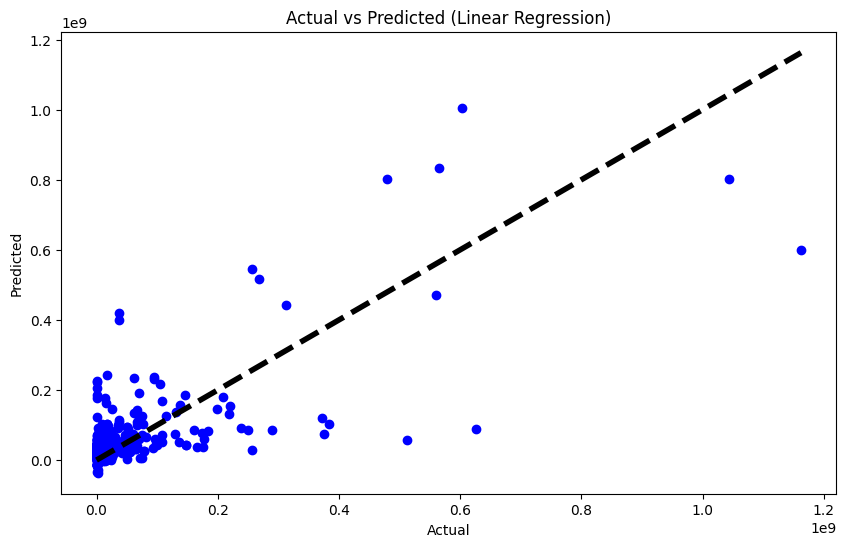

                    feature  importance
1             GDP (PARTNER)    0.313660
0             GDP (NIGERIA)    0.056016
5   EXCHANGE RATE (NIGERIA)    0.042062
3      POPULATION (PARTNER)    0.005548
8  COMMON OFFICIAL LANGUAGE    0.001672
4                  DISTANCE   -0.002092
7                LANDLOCKED   -0.005760
6   EXCHANGE RATE (PARTNER)   -0.018963
2      POPULATION (NIGERIA)   -0.071560


In [19]:
# Perform the linear regression using the df_scaled dataframe.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Define the features excluding 'EXPORT (US DOLLAR)' and the target variable
X = df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1)
y = df_scaled['IMPORT (US DOLLAR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Transform the scaled predictions and the test target variable back to the original scale
y_pred_unscaled = scaler.inverse_transform(np.column_stack((y_pred, y_pred, y_pred, y_pred, y_pred, y_pred, y_pred, y_pred, y_pred)))[:, 0]
y_test_unscaled = scaler.inverse_transform(np.column_stack((y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test)))[:, 0]

# Calculate the mean squared error and the R-squared value
r2 = r2_score(y_test_unscaled, y_pred_unscaled)
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
rmse = rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, color='blue')
plt.plot([y_test_unscaled.min(), y_test_unscaled.max()], [y_test_unscaled.min(), y_test_unscaled.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()

# Using statsmodels to find p-values and other statistics
X_train_sm = sm.add_constant(X_train)  # Adding a constant term
sm_model = sm.OLS(y_train, X_train_sm).fit()  # Fit the model

# Find the feature importance of the  features from this linear regression and rank them from highest to lowest
# Get feature importance
importance = model.coef_

# Create a dataframe with feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importance})

# Sort by importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Print feature importance
print(feature_importance)


Ridge Regression Results:
Best alpha: 1.4174741629268048
R-squared: 0.47099789946104553
Mean squared error: 7650143222996881.0
Root mean squared error: 87465097.17022489


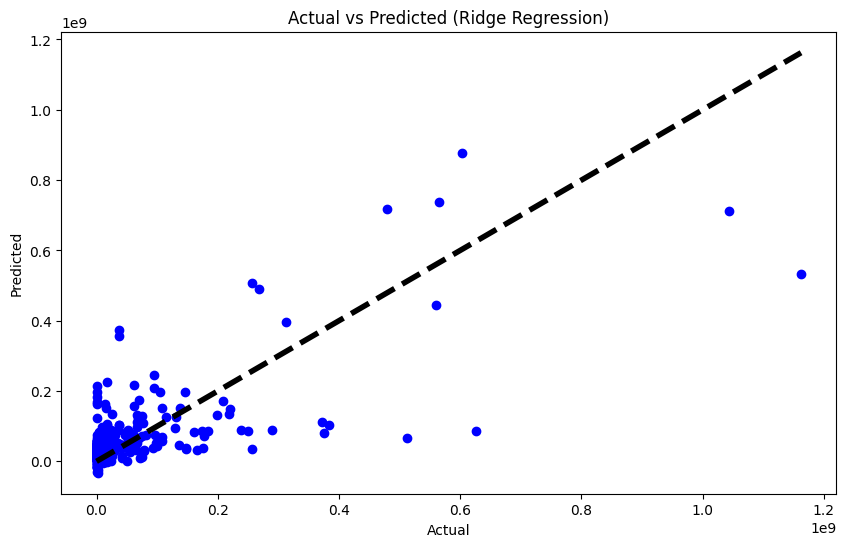

                    feature  importance
1             GDP (PARTNER)    0.268835
0             GDP (NIGERIA)    0.031073
3      POPULATION (PARTNER)    0.014726
8  COMMON OFFICIAL LANGUAGE    0.003180
4                  DISTANCE    0.001117
5   EXCHANGE RATE (NIGERIA)   -0.000107
7                LANDLOCKED   -0.005565
2      POPULATION (NIGERIA)   -0.015913
6   EXCHANGE RATE (PARTNER)   -0.020564


In [21]:
# Perform the Ridge regression using the df_scaled dataframe
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Define the features excluding 'EXPORT (US DOLLAR)' and the target variable
X = df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1)
y = df_scaled['IMPORT (US DOLLAR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Ridge regression model
model_ridge = Ridge()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': np.logspace(-5, 5, 100)}

# Initialize GridSearchCV with the Ridge regression model and the parameter grid
grid_search = GridSearchCV(model_ridge, param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Predict on the testing data
y_pred_ridge = best_model.predict(X_test)

# Transform the scaled predictions and the test target variable back to the original scale
y_pred_ridge_unscaled = scaler.inverse_transform(np.column_stack((y_pred_ridge, y_pred_ridge, y_pred_ridge, y_pred_ridge, y_pred_ridge, y_pred_ridge, y_pred_ridge, y_pred_ridge, y_pred_ridge)))[:, 0]
y_test_unscaled = scaler.inverse_transform(np.column_stack((y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test)))[:, 0]

# Calculate the mean squared error and the R-squared value
r2_ridge = r2_score(y_test_unscaled, y_pred_ridge_unscaled)
mse_ridge = mean_squared_error(y_test_unscaled, y_pred_ridge_unscaled)
rmse_ridge = rmse = np.sqrt(mse_ridge)

print("Ridge Regression Results:")
print("Best alpha:", best_alpha)
print("R-squared:", r2_ridge)
print("Mean squared error:", mse_ridge)
print("Root mean squared error:", rmse_ridge)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_unscaled, y_pred_ridge_unscaled, color='blue')
plt.plot([y_test_unscaled.min(), y_test_unscaled.max()], [y_test_unscaled.min(), y_test_unscaled.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.show()

# Get feature importance
importance_ridge = best_model.coef_

# Create a dataframe with feature importance
feature_importance_ridge = pd.DataFrame({'feature': X_train.columns, 'importance': importance_ridge})

# Sort by importance
feature_importance_ridge = feature_importance_ridge.sort_values(by='importance', ascending=False)

# Print feature importance
print(feature_importance_ridge)


Lasso Regression Results:
Best alpha: 0.00016297508346206434
R-squared: 0.4635686344108162
Mean squared error: 7757581249458317.0
Root mean squared error: 88077132.38666616


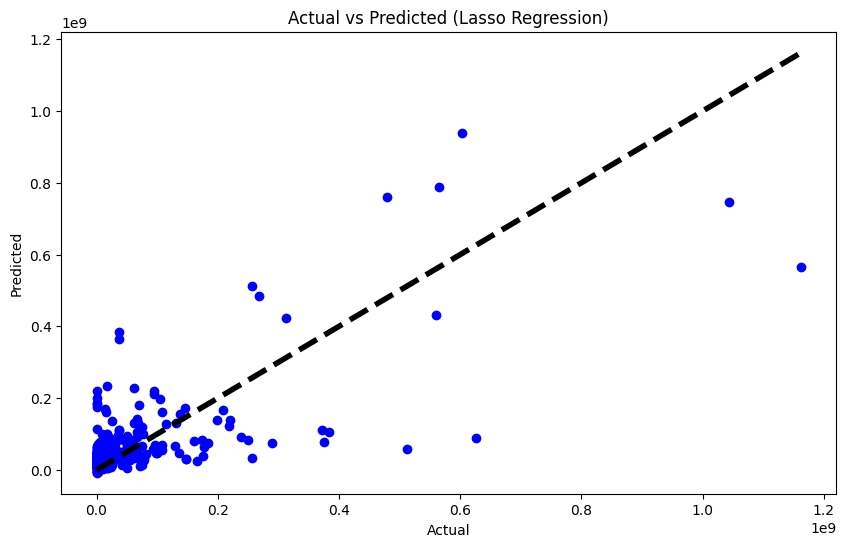

                    feature  importance
1             GDP (PARTNER)    0.293734
0             GDP (NIGERIA)    0.019087
3      POPULATION (PARTNER)    0.002268
8  COMMON OFFICIAL LANGUAGE    0.001624
2      POPULATION (NIGERIA)   -0.000000
4                  DISTANCE   -0.000000
7                LANDLOCKED   -0.003127
5   EXCHANGE RATE (NIGERIA)   -0.007828
6   EXCHANGE RATE (PARTNER)   -0.007838


In [23]:
# Perform the Lasso regression using the df_scaled dataframe
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Define the features excluding 'EXPORT (US DOLLAR)' and the target variable
X = df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1)
y = df_scaled['IMPORT (US DOLLAR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Lasso regression model
model_lasso = Lasso()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': np.logspace(-5, 5, 100)}

# Initialize GridSearchCV with the Lasso regression model and the parameter grid
grid_search_lasso = GridSearchCV(model_lasso, param_grid, cv=5)

# Fit the model on the training data
grid_search_lasso.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model_lasso = grid_search_lasso.best_estimator_
best_alpha_lasso = grid_search_lasso.best_params_['alpha']

# Predict on the testing data
y_pred_lasso = best_model_lasso.predict(X_test)

# Transform the scaled predictions and the test target variable back to the original scale
y_pred_lasso_unscaled = scaler.inverse_transform(np.column_stack((y_pred_lasso, y_pred_lasso, y_pred_lasso, y_pred_lasso, y_pred_lasso, y_pred_lasso, y_pred_lasso, y_pred_lasso, y_pred_lasso)))[:, 0]
y_test_unscaled = scaler.inverse_transform(np.column_stack((y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test)))[:, 0]

# Calculate the mean squared error and the R-squared value
r2_lasso = r2_score(y_test_unscaled, y_pred_lasso_unscaled)
mse_lasso = mean_squared_error(y_test_unscaled, y_pred_lasso_unscaled)
rmse_lasso = rmse = np.sqrt(mse_lasso)

print("Lasso Regression Results:")
print("Best alpha:", best_alpha_lasso)
print("R-squared:", r2_lasso)
print("Mean squared error:", mse_lasso)
print("Root mean squared error:", rmse_lasso)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_unscaled, y_pred_lasso_unscaled, color='blue')
plt.plot([y_test_unscaled.min(), y_test_unscaled.max()], [y_test_unscaled.min(), y_test_unscaled.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Lasso Regression)')
plt.show()

# Find the feature importance of the lasso regression and rank them
# Get feature importance
importance_lasso = best_model_lasso.coef_

# Create a dataframe with feature importance
feature_importance_lasso = pd.DataFrame({'feature': X_train.columns, 'importance': importance_lasso})

# Sort by importance
feature_importance_lasso = feature_importance_lasso.sort_values(by='importance', ascending=False)

# Print feature importance
print(feature_importance_lasso)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest Regression Results (Fine-tuned):
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R-squared: 0.7502378219710758
Mean squared error: 3611925986044764.0
Root mean squared error: 60099301.04456094


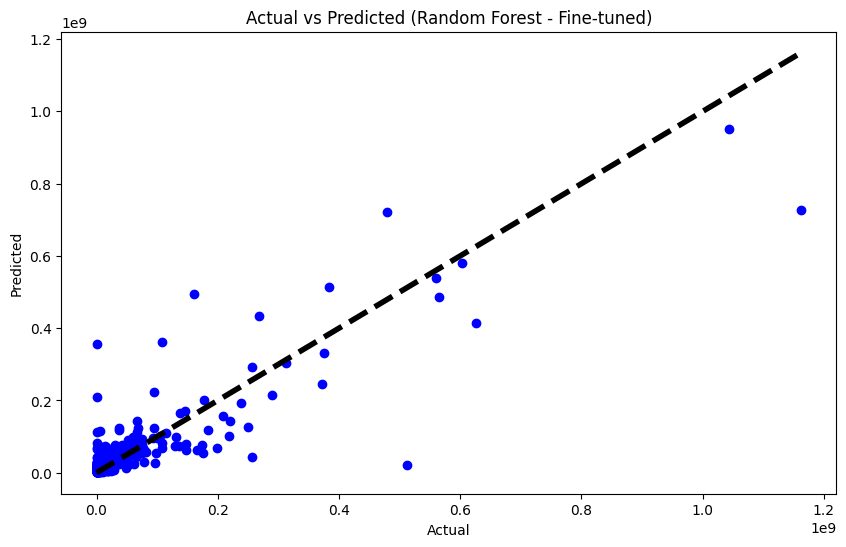

In [24]:
# Perform the Random Forest regression using the df_scaled dataframe

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Define the features excluding 'EXPORT (US DOLLAR)' and the target variable
X = df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1)
y = df_scaled['IMPORT (US DOLLAR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Random Forest Regressor and the parameter grid
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search_rf.best_params_

# Train the Random Forest model with the best parameters
best_model_rf = RandomForestRegressor(**best_params, random_state=42)
best_model_rf.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf_best = best_model_rf.predict(X_test)

# Transform the scaled predictions and the test target variable back to the original scale
y_pred_rf_best_unscaled = scaler.inverse_transform(np.column_stack((y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best)))[:, 0]
y_test_unscaled = scaler.inverse_transform(np.column_stack((y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test)))[:, 0]

# Calculate the mean squared error and the R-squared value
r2_rf_best = r2_score(y_test_unscaled, y_pred_rf_best_unscaled)
mse_rf_best = mean_squared_error(y_test_unscaled, y_pred_rf_best_unscaled)
rmse_rf_best = rmse = np.sqrt(mse_rf_best)

print("Random Forest Regression Results (Fine-tuned):")
print("Best parameters:", grid_search_rf.best_params_)
print("R-squared:", r2_rf_best)
print("Mean squared error:", mse_rf_best)
print("Root mean squared error:", rmse_rf_best)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_unscaled, y_pred_rf_best_unscaled, color='blue')
plt.plot([y_test_unscaled.min(), y_test_unscaled.max()], [y_test_unscaled.min(), y_test_unscaled.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Random Forest - Fine-tuned)')
plt.show()



Fitting 3 folds for each of 288 candidates, totalling 864 fits
MLP Regression Results (Fine-tuned):
Best parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
R-squared: 0.37281012168196026
Mean squared error: 9070081937781776.0
Root mean squared error: 95236977.78584626


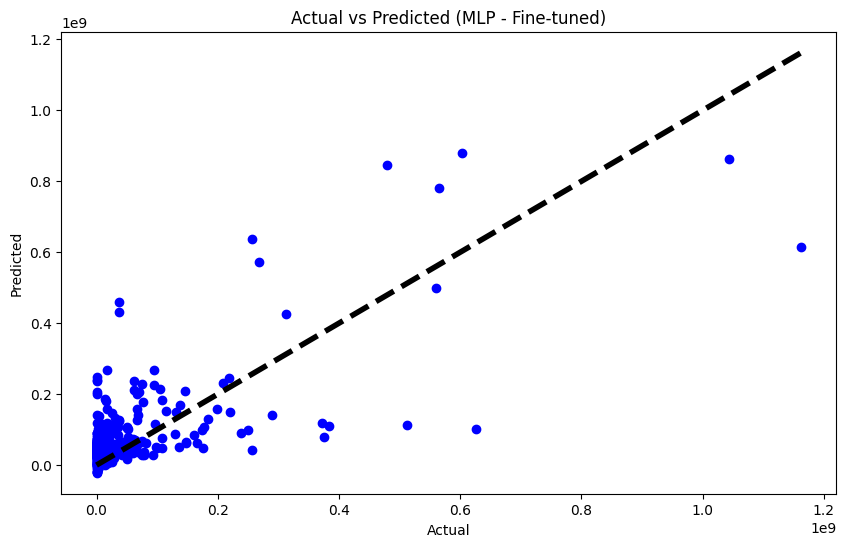

In [25]:
# Perform the neural network regression using the df_scaled dataframe

# Import necessary libraries
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Define the features excluding 'EXPORT (US DOLLAR)' and the target variable
X = df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1)
y = df_scaled['IMPORT (US DOLLAR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPRegressor
model_mlp = MLPRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01],  # Explicit learning rate
    'max_iter': [200, 300],  # Number of epochs
}

# Initialize GridSearchCV with the MLPRegressor and the parameter grid
grid_search_mlp = GridSearchCV(estimator=model_mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search on the training data
grid_search_mlp.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search_mlp.best_params_

# Train the MLPRegressor model with the best parameters
best_model_mlp = MLPRegressor(**best_params, random_state=42)
best_model_mlp.fit(X_train, y_train)

# Predict on the testing data
y_pred_mlp_best = best_model_mlp.predict(X_test)

# Transform the scaled predictions and the test target variable back to the original scale
y_pred_mlp_best_unscaled = scaler.inverse_transform(np.column_stack((y_pred_mlp_best, y_pred_mlp_best, y_pred_mlp_best, y_pred_mlp_best, y_pred_mlp_best, y_pred_mlp_best, y_pred_mlp_best, y_pred_mlp_best, y_pred_mlp_best)))[:, 0]
y_test_unscaled = scaler.inverse_transform(np.column_stack((y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test)))[:, 0]

# Calculate the mean squared error and the R-squared value
r2_mlp_best = r2_score(y_test_unscaled, y_pred_mlp_best_unscaled)
mse_mlp_best = mean_squared_error(y_test_unscaled, y_pred_mlp_best_unscaled)
rmse_mlp_best = rmse = np.sqrt(mse_mlp_best)

print("MLP Regression Results (Fine-tuned):")
print("Best parameters:", grid_search_mlp.best_params_)
print("R-squared:", r2_mlp_best)
print("Mean squared error:", mse_mlp_best)
print("Root mean squared error:", rmse_mlp_best)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_unscaled, y_pred_mlp_best_unscaled, color='blue')
plt.plot([y_test_unscaled.min(), y_test_unscaled.max()], [y_test_unscaled.min(), y_test_unscaled.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (MLP - Fine-tuned)')
plt.show()

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Gradient Boosting Regression Results (Fine-tuned):
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
R-squared: 0.6713231730191056
Mean squared error: 4753147100781410.0
Root mean squared error: 68943071.44870621


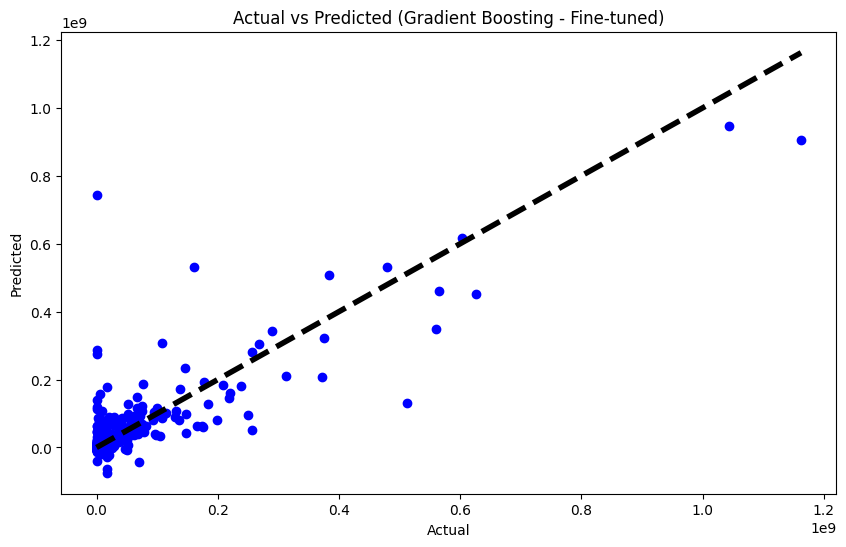

                    feature  importance
1             GDP (PARTNER)    0.436860
3      POPULATION (PARTNER)    0.271485
6   EXCHANGE RATE (PARTNER)    0.088977
5   EXCHANGE RATE (NIGERIA)    0.064002
4                  DISTANCE    0.046584
2      POPULATION (NIGERIA)    0.043418
0             GDP (NIGERIA)    0.043255
7                LANDLOCKED    0.002834
8  COMMON OFFICIAL LANGUAGE    0.002586


In [26]:
# Perform the Gradient Boost regression using the df_scaled dataframe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Define the features excluding 'EXPORT (US DOLLAR)' and the target variable
X = df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1)
y = df_scaled['IMPORT (US DOLLAR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Gradient Boosting Regressor and the parameter grid
grid_search_gbr = GridSearchCV(estimator=model_gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search on the training data
grid_search_gbr.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search_gbr.best_params_

# Train the Gradient Boosting Regressor with the best parameters
best_model_gbr = GradientBoostingRegressor(**best_params, random_state=42)
best_model_gbr.fit(X_train, y_train)

# Predict on the testing data
y_pred_gbr_best = best_model_gbr.predict(X_test)

# Transform the scaled predictions and the test target variable back to the original scale
y_pred_gbr_best_unscaled = scaler.inverse_transform(np.column_stack((y_pred_gbr_best, y_pred_gbr_best, y_pred_gbr_best, y_pred_gbr_best, y_pred_gbr_best, y_pred_gbr_best, y_pred_gbr_best, y_pred_gbr_best, y_pred_gbr_best)))[:, 0]
y_test_unscaled = scaler.inverse_transform(np.column_stack((y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test)))[:, 0]

# Calculate the mean squared error and the R-squared value
r2_gbr_best = r2_score(y_test_unscaled, y_pred_gbr_best_unscaled)
mse_gbr_best = mean_squared_error(y_test_unscaled, y_pred_gbr_best_unscaled)
rmse_gbr_best = rmse = np.sqrt(mse_gbr_best)

print("Gradient Boosting Regression Results (Fine-tuned):")
print("Best parameters:", grid_search_gbr.best_params_)
print("R-squared:", r2_gbr_best)
print("Mean squared error:", mse_gbr_best)
print("Root mean squared error:", rmse_gbr_best)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_unscaled, y_pred_gbr_best_unscaled, color='blue')
plt.plot([y_test_unscaled.min(), y_test_unscaled.max()], [y_test_unscaled.min(), y_test_unscaled.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Gradient Boosting - Fine-tuned)')
plt.show()


# Get feature importance
importance_gbr_best = best_model_gbr.feature_importances_

# Create a dataframe with feature importance
feature_importance_gbr_best = pd.DataFrame({'feature': X_train.columns, 'importance': importance_gbr_best})

# Sort by importance
feature_importance_gbr_best = feature_importance_gbr_best.sort_values(by='importance', ascending=False)
print(feature_importance_gbr_best)


In [27]:
# Perform the Random Forest regression using the df_scaled dataframe and Predict Import for 2020 and 2021
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Define the features excluding 'EXPORT (US DOLLAR)' and the target variable
X = df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1)
y = df_scaled['IMPORT (US DOLLAR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Random Forest Regressor and the parameter grid
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search_rf.best_params_

# Train the Random Forest model with the best parameters
best_model_rf = RandomForestRegressor(**best_params, random_state=42)
best_model_rf.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf_best = best_model_rf.predict(X_test)

# Transform the scaled predictions and the test target variable back to the original scale
y_pred_rf_best_unscaled = scaler.inverse_transform(np.column_stack((y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best, y_pred_rf_best)))[:, 0]
y_test_unscaled = scaler.inverse_transform(np.column_stack((y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test, y_test)))[:, 0]

# Calculate the mean squared error and the R-squared value
r2_rf_best = r2_score(y_test_unscaled, y_pred_rf_best_unscaled)
mse_rf_best = mean_squared_error(y_test_unscaled, y_pred_rf_best_unscaled)
rmse_rf_best = rmse = np.sqrt(mse_rf_best)

print("Random Forest Regression Results (Fine-tuned):")
print("Best parameters:", grid_search_rf.best_params_)
print("R-squared:", r2_rf_best)
print("Mean squared error:", mse_rf_best)
print("Root mean squared error:", rmse_rf_best)

# Filter the dataset for the years 2020 and 2021
X_2020_2021 = df_scaled[(df_scaled['YEAR'] == 2020) | (df_scaled['YEAR'] == 2021)].drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1)

# Predict the 'IMPORT (US DOLLAR)' for 2020 and 2021
y_pred_2020_2021 = best_model_rf.predict(X_2020_2021)

# Transform the scaled predictions back to the original scale
y_pred_2020_2021_unscaled = scaler.inverse_transform(np.column_stack((y_pred_2020_2021, y_pred_2020_2021, y_pred_2020_2021, y_pred_2020_2021, y_pred_2020_2021, y_pred_2020_2021, y_pred_2020_2021, y_pred_2020_2021, y_pred_2020_2021)))[:, 0]

# Create a DataFrame to display the results
results_2020_2021 = df_scaled[(df_scaled['YEAR'] == 2020) | (df_scaled['YEAR'] == 2021)][['REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR']].copy()
results_2020_2021['PREDICTED IMPORT (US DOLLAR)'] = y_pred_2020_2021_unscaled

print(results_2020_2021)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest Regression Results (Fine-tuned):
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R-squared: 0.7502378219710758
Mean squared error: 3611925986044764.0
Root mean squared error: 60099301.04456094
     REPORTER COUNTRY PARTNER COUNTRY  YEAR  PREDICTED IMPORT (US DOLLAR)
24            NIGERIA          Angola  2020                  4.437476e+06
25            NIGERIA          Angola  2021                  6.316766e+06
50            NIGERIA       Argentina  2020                  9.701244e+07
51            NIGERIA       Argentina  2021                  7.450939e+07
76            NIGERIA       Australia  2020                  6.516813e+07
...               ...             ...   ...                           ...
1767          NIGERIA         Uruguay  2021                  1.856924e+07
1792          NIGERIA        Viet Nam  2020                  9.500145e+06
1793     

In [28]:
#save the predictions data frame as a new csv file

results_2020_2021.to_csv('/content/drive/My Drive/Project data/predicted_imports_2020_2021.csv', index=False)
